In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import plot_confusion_matrix

In [4]:
import os
root = './features/'
files = os.listdir(root)
files = [f for f in files if f[-4:] == '.csv']
files

['210815_0_1_label_mc_mix1_syt_features_20Frame_demo.csv',
 '210815_0_1_label_mc_mix1_syt_features_5Frame_demo.csv',
 '210815_0_1_label_mc_mix1_syt_features_1Frame_demo.csv']

### Open data as df first to inspect

In [55]:
dfs = []
for f in files:
    df = pd.read_csv(root+f, index_col=[0])
    dfs.append(df)
    
dfs[0]

,roi_ID,area,center_of_mass_row,center_of_mass_column,mean_fluorescence,min_fluorescence,max_fluorescence,mean_stimulus_demo,min_stimulus_demo,max_stimulus_demo,label
0,210815_0_1_stackRaw_mc_mix1_syt_0,8.620714,33.751088,75.917544,1078.634865,0.0,2580.297830,0.0,0.0,0.0,tm2
1,210815_0_1_stackRaw_mc_mix1_syt_0,8.620714,33.751088,75.917544,619.321891,0.0,2305.262146,0.0,0.0,0.0,tm2
2,210815_0_1_stackRaw_mc_mix1_syt_0,8.620714,33.751088,75.917544,686.776317,0.0,3136.652153,0.0,0.0,0.0,tm2
3,210815_0_1_stackRaw_mc_mix1_syt_0,8.620714,33.751088,75.917544,331.757641,0.0,1464.476230,0.0,0.0,0.0,tm2
4,210815_0_1_stackRaw_mc_mix1_syt_0,8.620714,33.751088,75.917544,14.401027,0.0,288.020547,0.0,0.0,0.0,tm2
...,...,...,...,...,...,...,...,...,...,...,...
2745,210815_0_1_stackRaw_mc_mix1_syt_9,9.920591,26.478135,67.167647,26.624909,0.0,337.656025,0.0,0.0,0.0,tm4
2746,210815_0_1_stackRaw_mc_mix1_syt_9,9.920591,26.478135,67.167647,404.256545,0.0,1996.676724,0.0,0.0,0.0,tm4
2747,210815_0_1_stackRaw_mc_mix1_syt_9,9.920591,26.478135,67.167647,230.023644,0.0,2360.807133,0.0,0.0,0.0,tm4
2748,210815_0_1_stackRaw_mc_mix1_syt_9,9.920591,26.478135,67.167647,48.441580,0.0,521.226255,0.0,0.0,0.0,tm4


In [56]:
dfs[1]

,roi_ID,area,center_of_mass_row,center_of_mass_column,mean_fluorescence,min_fluorescence,max_fluorescence,mean_stimulus_demo,min_stimulus_demo,max_stimulus_demo,label
0,210815_0_1_stackRaw_mc_mix1_syt_0,8.620714,33.751088,75.917544,0.000000,0.000000,0.000000,0.0,0.0,0.0,tm2
1,210815_0_1_stackRaw_mc_mix1_syt_0,8.620714,33.751088,75.917544,1880.387464,470.268115,2580.297830,0.0,0.0,0.0,tm2
2,210815_0_1_stackRaw_mc_mix1_syt_0,8.620714,33.751088,75.917544,817.715097,318.069540,1456.176911,0.0,0.0,0.0,tm2
3,210815_0_1_stackRaw_mc_mix1_syt_0,8.620714,33.751088,75.917544,1616.436900,756.579094,2447.480624,0.0,0.0,0.0,tm2
4,210815_0_1_stackRaw_mc_mix1_syt_0,8.620714,33.751088,75.917544,779.327276,2.095554,1660.016718,0.0,0.0,0.0,tm2
...,...,...,...,...,...,...,...,...,...,...,...
11025,210815_0_1_stackRaw_mc_mix1_syt_9,9.920591,26.478135,67.167647,0.000000,0.000000,0.000000,0.0,0.0,0.0,tm4
11026,210815_0_1_stackRaw_mc_mix1_syt_9,9.920591,26.478135,67.167647,0.000000,0.000000,0.000000,0.0,0.0,0.0,tm4
11027,210815_0_1_stackRaw_mc_mix1_syt_9,9.920591,26.478135,67.167647,0.000000,0.000000,0.000000,0.0,0.0,0.0,tm4
11028,210815_0_1_stackRaw_mc_mix1_syt_9,9.920591,26.478135,67.167647,290.630163,0.000000,1032.924963,0.0,0.0,0.0,tm4


In [57]:
dfs[2]

,roi_ID,area,center_of_mass_row,center_of_mass_column,fluorescence,stimulus_demo,label
0,210815_0_1_stackRaw_mc_mix1_syt_0,8.620714,33.751088,75.917544,0.000000,0.0,tm2
1,210815_0_1_stackRaw_mc_mix1_syt_0,8.620714,33.751088,75.917544,0.000000,0.0,tm2
2,210815_0_1_stackRaw_mc_mix1_syt_0,8.620714,33.751088,75.917544,0.000000,0.0,tm2
3,210815_0_1_stackRaw_mc_mix1_syt_0,8.620714,33.751088,75.917544,0.000000,0.0,tm2
4,210815_0_1_stackRaw_mc_mix1_syt_0,8.620714,33.751088,75.917544,0.000000,0.0,tm2
...,...,...,...,...,...,...,...
55185,210815_0_1_stackRaw_mc_mix1_syt_9,9.920591,26.478135,67.167647,0.000000,0.0,tm4
55186,210815_0_1_stackRaw_mc_mix1_syt_9,9.920591,26.478135,67.167647,4853.440385,0.0,tm4
55187,210815_0_1_stackRaw_mc_mix1_syt_9,9.920591,26.478135,67.167647,6498.852748,0.0,tm4
55188,210815_0_1_stackRaw_mc_mix1_syt_9,9.920591,26.478135,67.167647,7400.944951,0.0,tm4


### Convert to numpy arrays (works better with scikitlearn?)

In [58]:
## not using, numpy doesn't work well with the labels
# specify the index of the columns to use
# cols = (2,3,4,5,6,7,8,9,10,11)

# data_1Frame = np.array(np.genfromtxt(root + files[0], delimiter=",", names=True, usecols=cols),)
# data_20Frame = np.genfromtxt(root + files[1], delimiter=",", names=True, usecols=cols)
# data_5Frame = np.genfromtxt('./features/210815_0_1_label_mc_mix1_syt_features_1Frame_demo.csv', delimiter=",", names=True, usecols=cols)

# print(data_1Frame)
# print(data_20Frame)
# print(data_5Frame)

### Split data

In [59]:
for i in range(0,len(dfs)):
    X = dfs[i].drop(columns = ['roi_ID', 'label'])
    y = dfs[i].label
    dfs[i]=[X,y]

In [63]:
dfs[2][0]

,area,center_of_mass_row,center_of_mass_column,fluorescence,stimulus_demo
0,8.620714,33.751088,75.917544,0.000000,0.0
1,8.620714,33.751088,75.917544,0.000000,0.0
2,8.620714,33.751088,75.917544,0.000000,0.0
3,8.620714,33.751088,75.917544,0.000000,0.0
4,8.620714,33.751088,75.917544,0.000000,0.0
...,...,...,...,...,...
55185,9.920591,26.478135,67.167647,0.000000,0.0
55186,9.920591,26.478135,67.167647,4853.440385,0.0
55187,9.920591,26.478135,67.167647,6498.852748,0.0
55188,9.920591,26.478135,67.167647,7400.944951,0.0


In [62]:
dfs[2][1]

0        tm2
1        tm2
2        tm2
3        tm2
4        tm2
        ... 
55185    tm4
55186    tm4
55187    tm4
55188    tm4
55189    tm4
Name: label, Length: 55190, dtype: object

In [ ]:
h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

conf_matricies = []

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(dfs):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X) # how well does this work as is??
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    # iterate over classifiers
    for name, clf in zip(names, classifiers):

        clf.fit(X_train, y_train)
        
        score = clf.score(X_test, y_test)

        preds = clf.predict(X_test)
        
        conf_matricies.append([ds_cnt,name])
        print(ds_cnt, name)
        print(confusion_matrix(y_test, preds))



0 Nearest Neighbors
[[107   0   0   0   0]
 [  0 112   0   0   0]
 [  0   0 549  11   0]
 [  0   0  11 192   0]
 [  0   0   1   0 117]]
0 Linear SVM
[[107   0   0   0   0]
 [  0 112   0   0   0]
 [  0   0 456 104   0]
 [  0   0 100 103   0]
 [  0   0   0   0 118]]
0 RBF SVM
[[ 98   0   9   0   0]
 [  0 101  11   0   0]
 [  0   0 560   0   0]
 [  0   0  44 159   0]
 [  0   0  51   0  67]]


In [ ]:
np.save("conf_matrix.npy", conf_matrices)

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (2750).

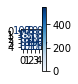

In [70]:
h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

# X, y = make_classification(
#     n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
# )
# rng = np.random.RandomState(2)
# X += 2 * rng.uniform(size=X.shape)
# linearly_separable = (X, y)

# datasets = [
#     make_moons(noise=0.3, random_state=0),
#     make_circles(noise=0.2, factor=0.5, random_state=1),
#     linearly_separable,
# ]

# figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(dfs):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X) # how well does this work as is??
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    # x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    # y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    # xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    # cm = plt.cm.RdBu
    # cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    # ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # if ds_cnt == 0:
    #     ax.set_title("Input data")
    # # Plot the training points
    # ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # # Plot the testing points
    # ax.scatter(
    #     X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    # )
    # ax.set_xlim(xx.min(), xx.max())
    # ax.set_ylim(yy.min(), yy.max())
    # ax.set_xticks(())
    # ax.set_yticks(())
    # i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        
        ax = plt.subplot(len(dfs), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        
        score = clf.score(X_test, y_test)

        preds = clf.predict(X_test)
        # ConfusionMatrixDisplay.from_predictions(y_test, preds)
        
        
        # plot_confusion_matrix(clf, 
        #                   X_test, 
        #                   y_test, 
        #                   ax=ax, 
        #                   cmap='Blues',
        #                  display_labels=y)
        
        
#         # Plot the decision boundary. For that, we will assign a color to each
#         # point in the mesh [x_min, x_max]x[y_min, y_max].
#         if hasattr(clf, "decision_function"):
#             Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#         else:
#             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

#         # Put the result into a color plot
#         Z = Z.reshape(xx.shape)
#         ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # # Plot the training points
        # ax.scatter(
        #     X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        # )
        # # Plot the testing points
        # ax.scatter(
        #     X_test[:, 0],
        #     X_test[:, 1],
        #     c=y_test,
        #     cmap=cm_bright,
        #     edgecolors="k",
        #     alpha=0.6,
        # )

        # ax.set_xlim(xx.min(), xx.max())
        # ax.set_ylim(yy.min(), yy.max())
        # # ax.set_xticks(())
        # # ax.set_yticks(())
        # if ds_cnt == 0:
        #     ax.set_title(name)
        # ax.text(
        #     xx.max() - 0.3,
        #     yy.min() + 0.3,
        #     ("%.2f" % score).lstrip("0"),
        #     size=15,
        #     horizontalalignment="right",
        # )
        i += 1

# plt.tight_layout()
# plt.show()